In [97]:
import torch
import torchvision
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

Basics of pytorch

In [3]:
x = torch.tensor([2.5,0.1])
print(x)

tensor([2.5000, 0.1000])


In [4]:
x = torch.rand(2,2)
y = torch.rand(2,2)
# y.add_(x)
# print(y)
print(x)
print(y)
# z= x+y
z = torch.add(x,y)
print(z)

tensor([[0.2417, 0.6173],
        [0.4150, 0.6837]])
tensor([[0.1965, 0.5960],
        [0.4553, 0.2973]])
tensor([[0.4382, 1.2133],
        [0.8703, 0.9810]])


In [5]:
x = torch.rand(4,4)
print(x)
y= x.view(-1,8)
print(y.size())

tensor([[0.8213, 0.6431, 0.7928, 0.3410],
        [0.1532, 0.2795, 0.6350, 0.9342],
        [0.1054, 0.9221, 0.9123, 0.3146],
        [0.9175, 0.1928, 0.5509, 0.6039]])
torch.Size([2, 8])


In [6]:
a= torch.ones(5)
# print(a)
b = a.numpy()
# print(b)
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [7]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(5,device=device)
    y = torch.ones(5)
    y = y.to(device)
    z = x + y
    ## numpy only works on cpu
    # z.numpy()
    print(z)

tensor([2., 2., 2., 2., 2.], device='cuda:0')


Autograd

In [8]:
## requires grad = true makes the jacobian automatically
x = torch.randn(3, requires_grad=True)
print(x)
y = x + 2
print(y)
z = y*y*2
z = z.mean()
print(z)

z.backward() #dz/dx
print(x.grad)

tensor([0.7360, 0.9878, 0.2846], requires_grad=True)
tensor([2.7360, 2.9878, 2.2846], grad_fn=<AddBackward0>)
tensor(14.4214, grad_fn=<MeanBackward0>)
tensor([3.6480, 3.9838, 3.0461])


In [9]:
## requires grad = false, so back propagation wont work 
x = torch.randn(3, requires_grad=False)
print(x)
y = x + 2
print(y)
z = y*y*2
z = z.mean()
print(z)

# z.backward() #dz/dx
# print(x.grad)

tensor([0.7527, 0.8423, 0.6666])
tensor([2.7527, 2.8423, 2.6666])
tensor(15.1779)


In [10]:
## to make backprop work we need to enter a jacobian manually then
x = torch.randn(3, requires_grad=True)
print(x)
y = x + 2
print(y)
z = y*y*2
# z = z.mean()
print(z)

v = torch.tensor([0.1,1.0,0.001] , dtype=torch.float32) # jacobian vector
z.backward(v) #dz/dx
print(x.grad)

tensor([ 0.5941,  0.5124, -0.2263], requires_grad=True)
tensor([2.5941, 2.5124, 1.7737], grad_fn=<AddBackward0>)
tensor([13.4584, 12.6248,  6.2919], grad_fn=<MulBackward0>)
tensor([1.0376e+00, 1.0050e+01, 7.0947e-03])


3 ways to make sure torch does not track history of grad function in the computation graph as when we update weights during backprop we dont want it to track
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

In [11]:
x = torch.randn(3, requires_grad=True)
print(x)
x.requires_grad_(False)
print(x)

tensor([-1.6097,  0.6497, -2.9280], requires_grad=True)
tensor([-1.6097,  0.6497, -2.9280])


In [12]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x.detach()
print(y)

tensor([ 0.4678,  1.5882, -0.9091], requires_grad=True)
tensor([ 0.4678,  1.5882, -0.9091])


In [13]:
x = torch.randn(3, requires_grad=True)
print(x)
with torch.no_grad():
    y = x + 2
    print(y)

tensor([0.8571, 0.2766, 0.4322], requires_grad=True)
tensor([2.8571, 2.2766, 2.4322])


In [14]:
weights = torch.ones(4, requires_grad=True)
for epocch in range(3):
    model_ouput = (weights*3).sum()

    model_ouput.backward()

    print(weights.grad)

    weights.grad.zero_() # empty the grad or it will sum up everything 

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


Backpropagation

In [15]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forwaed pass and compute the loss
y_hat = w*x
loss = (y_hat - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

###update weights
###next forward 

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


Prediction : Manual,
Gradients Computation : Manual,
Loss computation : Manual,
Parameter updates : Manual

In [20]:
## f = w*x 
# f = 2*x
X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype= np.float32)

w = 0.0

# model prediction
def forward(x) :
    return w * x

# loss
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x * (w*x - y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

## Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)

    #loss
    l = loss(Y,y_pred)

    #gradients
    dw = gradient(X,Y,y_pred)

    #update weights
    w -= learning_rate * dw

    if(epoch%2) == 0 :
        print(f'epoch {epoch + 1} : w = {w:.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1 : w = 1.200, loss = 30.00000000
epoch 3 : w = 1.872, loss = 0.76800019
epoch 5 : w = 1.980, loss = 0.01966083
epoch 7 : w = 1.997, loss = 0.00050331
epoch 9 : w = 1.999, loss = 0.00001288
epoch 11 : w = 2.000, loss = 0.00000033
epoch 13 : w = 2.000, loss = 0.00000001
epoch 15 : w = 2.000, loss = 0.00000000
epoch 17 : w = 2.000, loss = 0.00000000
epoch 19 : w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


Prediction : Manual,
Gradients Computation : Autograd,
Loss computation : Manual,
Parameter updates : Manual

In [25]:
## f = w*x 
# f = 2*x
X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype= torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x) :
    return w * x

# loss
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()


print(f'Prediction before training: f(5) = {forward(5):.3f}')

## Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)

    #loss
    l = loss(Y,y_pred)

    #gradients = backward pass
    l.backward() # dl/dw

    #update weights
    with torch.no_grad(): 
        w -= learning_rate * w.grad

    # zero gradients
    w.grad.zero_()

    if(epoch%10) == 0 :
        print(f'epoch {epoch + 1} : w = {w:.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1 : w = 0.300, loss = 30.00000000
epoch 11 : w = 1.665, loss = 1.16278565
epoch 21 : w = 1.934, loss = 0.04506890
epoch 31 : w = 1.987, loss = 0.00174685
epoch 41 : w = 1.997, loss = 0.00006770
epoch 51 : w = 1.999, loss = 0.00000262
epoch 61 : w = 2.000, loss = 0.00000010
epoch 71 : w = 2.000, loss = 0.00000000
epoch 81 : w = 2.000, loss = 0.00000000
epoch 91 : w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


Prediction : Manual,
Gradients Computation : Autograd, 
Loss computation : Pytorch Loss, 
Parameter updates : Pytorch Optimizer

In [27]:
## f = w*x 
# f = 2*x
X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype= torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x) :
    return w * x


print(f'Prediction before training: f(5) = {forward(5):.3f}')

## Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w],lr=learning_rate)

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)

    #loss
    l = loss(Y,y_pred)

    #gradients = backward pass
    l.backward() # dl/dw

    #update weights
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if(epoch%10) == 0 :
        print(f'epoch {epoch + 1} : w = {w:.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1 : w = 0.300, loss = 30.00000000
epoch 11 : w = 1.665, loss = 1.16278565
epoch 21 : w = 1.934, loss = 0.04506890
epoch 31 : w = 1.987, loss = 0.00174685
epoch 41 : w = 1.997, loss = 0.00006770
epoch 51 : w = 1.999, loss = 0.00000262
epoch 61 : w = 2.000, loss = 0.00000010
epoch 71 : w = 2.000, loss = 0.00000000
epoch 81 : w = 2.000, loss = 0.00000000
epoch 91 : w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


Prediction : Pytorch Model,
Gradients Computation : Autograd, 
Loss computation : Pytorch Loss, 
Parameter updates : Pytorch Optimizer

In [36]:
## f = w*x 
# f = 2*x
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype= torch.float32)

X_test = torch.tensor([5] , dtype=torch.float32)
n_samples , n_features = X.shape

input_size = n_features
output_size = n_features
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module) :
    def __init__(self,input_dim , output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self,x):
        return self.lin(x)
    
model = LinearRegression(input_size,output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

## Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = model(X)

    #loss
    l = loss(Y,y_pred)

    #gradients = backward pass
    l.backward() # dl/dw

    #update weights
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if(epoch%10) == 0 :
        [w,b] = model.parameters()
        print(f'epoch {epoch + 1} : w = {w[0][0].item():.3f}, loss = {l:.8f}')


print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = 4.818
epoch 1 : w = 1.016, loss = 7.14700794
epoch 11 : w = 1.631, loss = 0.27471912
epoch 21 : w = 1.737, loss = 0.09168920
epoch 31 : w = 1.760, loss = 0.08203067
epoch 41 : w = 1.769, loss = 0.07714427
epoch 51 : w = 1.776, loss = 0.07265113
epoch 61 : w = 1.783, loss = 0.06842241
epoch 71 : w = 1.789, loss = 0.06443992
epoch 81 : w = 1.796, loss = 0.06068916
epoch 91 : w = 1.802, loss = 0.05715669
Prediction after training: f(5) = 9.602


Linear Regression
# 1) Design model (input, output size, forward pass)
# 2 ) Construct loss and optimizer
# 3 ) Training Loop 
#  - forward pass : compute prediction 
#  - backward pass : gradients
#  - update weights

epoch: 10 , loss = 4409.7749
epoch: 20 , loss = 3289.0596
epoch: 30 , loss = 2478.3396
epoch: 40 , loss = 1891.2338
epoch: 50 , loss = 1465.6367
epoch: 60 , loss = 1156.8328
epoch: 70 , loss = 932.5792
epoch: 80 , loss = 769.5974
epoch: 90 , loss = 651.0603
epoch: 100 , loss = 564.7903


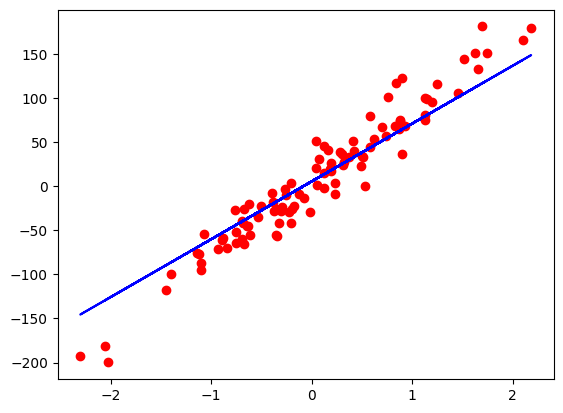

In [57]:
# prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features =1, noise = 20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

# model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optim
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backwawrd pass
    loss.backward()

    #update
    optimizer.step()

    optimizer.zero_grad()

    if(epoch + 1) % 10 == 0 :
        print(f'epoch: {epoch+1} , loss = {loss.item():.4f}')

#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()



Logistic Regression
# 1) Design model (input, output size, forward pass)
# 2 ) Construct loss and optimizer
# 3 ) Training Loop 
#  - forward pass : compute prediction 
#  - backward pass : gradients
#  - update weights

add one more layer and different loss function

In [59]:
## 0) prepare data
bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1234)

#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

## 1) model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module) :
    def __init__(self, n_input_features) -> None:
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self,x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

## 2) loss and opitm
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    #updates
    optimizer.step()

    #zero grad
    optimizer.zero_grad()

    if(epoch + 1)%10 == 0 :
        print(f'epoch : {epoch + 1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

epoch : 10, loss = 0.4744
epoch : 20, loss = 0.4087
epoch : 30, loss = 0.3632
epoch : 40, loss = 0.3298
epoch : 50, loss = 0.3040
epoch : 60, loss = 0.2835
epoch : 70, loss = 0.2667
epoch : 80, loss = 0.2526
epoch : 90, loss = 0.2406
epoch : 100, loss = 0.2302
accuracy = 0.9123


Dataset and dataloader

epcoh = 1 forward and backward pass of ALL training examples

batch_size = no.of training samples in one forward & backward pass

no.of iters = number of passes, each pass using [batch_size] nno.of samples

e.g. 100 samples, batch_size = 20 => 100 / 20 = 5 iterations for 1 epoch

In [74]:
class WineDataset(Dataset):
    def __init__ (self):
        # data loading
        xy = np.loadtxt('wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples , 1
        self.n_samples = xy.shape[0]

    def __getitem__(self, index) :
        # dataset[0]
        return self.x[index], self.y[index]

    def __len__(self):
        # len(dataset)
        return self.n_samples
    
dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers = 0)

# dataiter = iter(dataloader)
# data = next(dataiter)
# features, labels = data
# print(features)
# print(labels)

# traning loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs) :
    for i, (inputs, labels) in enumerate(dataloader) :
        # forward backward, update
        if( i+1) % 5 == 0 :
            print( f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


## Transforms and MNIST datasets

In [84]:
class WineDataset(Dataset):
    def __init__ (self, transfrom = None):
        # data loading
        xy = np.loadtxt('wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
        
        # note that we do not convert to tensor here
        self.x = xy[:, 1:]
        self.y = xy[:, [0]] # n_samples , 1
        self.n_samples = xy.shape[0]

        self.transfrom = transfrom

    def __getitem__(self, index) :
        # dataset[0]
        sample = self.x[index], self.y[index]
        if self.transfrom :
            sample = self.transfrom(sample)

        return sample

    def __len__(self):
        # len(dataset)
        return self.n_samples

class toTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
class mulTransfrom:
    def __init__ (self, factor):
        self.factor = factor

    def __call__ (self, sample):
        inputs, target = sample
        inputs += self.factor
        return inputs, target
    
dataset = WineDataset(transfrom=None)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([toTensor(),mulTransfrom(2)])
dataset = WineDataset(transfrom=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
tensor([  16.2300,    3.7100,    4.4300,   17.6000,  129.0000,    4.8000,
           5.0600,    2.2800,    4.2900,    7.6400,    3.0400,    5.9200,
        1067.0000])
<class 'torch.Tensor'> <class 'torch.Tensor'>


## Softmax and cross-Entropy

In [86]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


In [87]:
def cross_entropy(actual , predicted) :
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])
# y must be one hot encoded
# if class 0 : [1 0 0]
# if class 1 : [0 1 0]
# if class 2 : [0 0 1]
Y = np.array([1,0,0])

# y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


## nn.CrossEntropyLoss applies
## nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
--> No Softmax in last layer
Y has class labels, not One - Hot!
Y_pred has raw scores(logits), no Softmax!

In [92]:
loss = nn.CrossEntropyLoss()

# 3 samples
Y = torch.tensor([2,0,1])
# n_samples x nclasses = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1],[2.0, 1.0, 0.1],[0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1],[0.1, 1.0, 2.1],[0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

0.3018244206905365
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


## Multiclass

In [93]:
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self,x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at end
        return out
    
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() #applies softmax

In [94]:
## in case of binary classification ( is it a dog or not)
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self,x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at end
        y_pred = torch.sigmoid(out)
        return y_pred
    
model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

## Activation Functions
1. Step function
2. Sigmoid
3. TanH
4. ReLU
5. Leaky ReLU
6. Softmax

In [95]:
# option 1 (create nn modeules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

In [96]:
# option 2 (use activation functiosn directly in forward pass)
class NeuralNet(nn.Module):
    def __init__ (self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size,1)

    def forward(self,x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

## FeedForward